In [38]:
import tensorflow as tf 
import numpy as np
import seaborn as sn # for implementing heat graph
import cv2
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix #for plotting graph b/w truevalues and predictedvalues


In [39]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

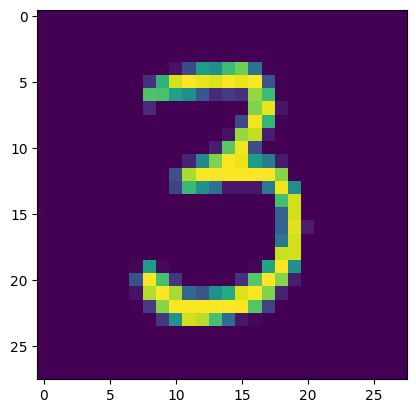

(10000, 28, 28)

In [40]:
import matplotlib.pyplot as plt
plt.imshow(X_train[50])
plt.show()

X_test.shape

In [41]:
print(y_train.shape)

(60000,)


In [42]:
print(np.unique(y_train))

print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [43]:
X_train= X_train/255.0
X_test= X_test/255.0

X_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [44]:
model = keras.Sequential(
    [keras.layers.Flatten(input_shape = (28,28)),
     keras.layers.Dense(50 , activation = 'relu' ),
     keras.layers.Dense(50 , activation = 'relu' ),
     keras.layers.Dense(10 , activation = 'sigmoid' )

     ]
)

model.compile(optimizer = 'adam' , loss  = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

C:\Users\jyoth\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.fit(X_train , y_train , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8471 - loss: 0.5427
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8471 - loss: 0.5427
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9571 - loss: 0.1455
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9571 - loss: 0.1455
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9689 - loss: 0.1029
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9689 - loss: 0.1029
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9745 - loss: 0.0827
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9745 - loss: 0.0827
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9788 - loss: 0.0671
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9788 - loss: 0.0671
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9822 - loss: 0.0568
Epoch 7/10
1875/1875 ━━━━━━━━━━━

In [46]:
loss , accuracy = model.evaluate(X_test , y_test)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.1039
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.1039
0.08928956836462021
0.08928956836462021


In [47]:
y_pred = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [48]:
y_pred[0]

array([6.3614752e-05, 2.5125630e-03, 1.5311443e-02, 5.1036548e-02,
       2.3311686e-05, 2.0019989e-03, 2.7312241e-10, 9.9999332e-01,
       5.5260293e-04, 8.3068743e-02], dtype=float32)

Converting prediction into class label

In [49]:
y_pred_labels  = [int(np.argmax(i)) for i in y_pred]
print(y_pred_labels)




[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 9, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [50]:
conMat = confusion_matrix(y_test , y_pred_labels )
print(conMat)

tf.Tensor(
[[ 969    0    3    0    0    1    3    2    2    0]
 [   0 1123    4    0    0    2    2    1    2    1]
 [   1    0 1019    0    3    1    1    4    3    0]
 [   0    0   15  978    0    2    1    4    6    4]
 [   1    0    1    0  956    1    8    3    1   11]
 [   2    0    0    4    1  871    8    0    5    1]
 [   3    1    2    0    4    4  943    0    1    0]
 [   2    1   16    2    2    1    0  988    3   13]
 [   7    0    7    2    2   11    3    3  935    4]
 [   2    1    0    5    9    5    1    3    2  981]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted_labels')

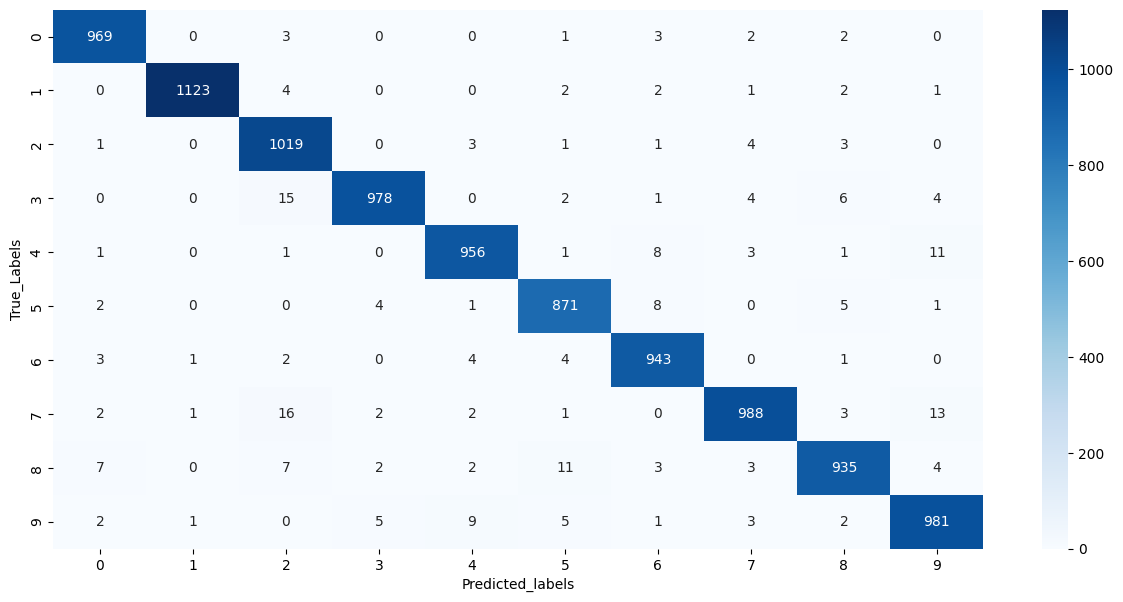

In [51]:
plt.figure(figsize = (15,7))
sn.heatmap(conMat , annot = True ,  fmt = 'd' , cmap = 'Blues')
plt.ylabel("True_Labels")
plt.xlabel("Predicted_labels")


In [59]:
path = 'number3mnist.png'

input_image = cv2.imread(path)

In [60]:
input_image.shape

(320, 326, 3)

In [61]:
grayscale = cv2.cvtColor(input_image , cv2.COLOR_RGB2GRAY)
grayscale.shape

(320, 326)

In [62]:
resized = cv2.resize(grayscale  , (28,28))

In [63]:
resized.shape

(28, 28)

In [65]:
resized = resized/255

In [ ]:
reshape = np.reshape(resized , [1,28,28])

In [67]:
prediction = model.predict(reshape)
print(np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
3
